## <font size="5"><font color='RED'>Predictive Analytics on Ames housing data

Ames Housing Authority is a public housing agency that serves the city of Ames, Iowa, US. It helps provide decent and safe rental housing for eligible low-income families, the elderly, and persons with disabilities.

The housing authority has collected 79 assessment parameters which describes every aspect of residential homes in Ames. These variables focus on the quality and quantity of the physical attributes of a property. Most of the variables are exactly the type of information that a typical home buyer would want to know about a potential property.

This is a perfect simulation for real-world analytics problem which can tell someone new to housing market as to what variables determines the house sale prices.

**Problem Statement:**

Predict Home Sale Price for the Test Data Set with the lowest possible error. Use train data for
model training.

## <font size="5"><font color='RED'>Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <font size="5"><font color='RED'> Reading the Data

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_test=pd.read_csv("test.csv")

In [4]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## <font size="5"><font color='RED'> 2.0 Data Summary & Analysis
## Descriptive statistics
    Dimensions of the dataset
    Peek at the data itself
    Statistical summary of attributes (includes the count, mean, min, max & percentiles)
    Breakdown of the data by the class variable.(# instances of each class as a count)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [8]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Visualization of the Target variable 'SalePrice'**

Skewness of SalePrice :  1.8828757597682129


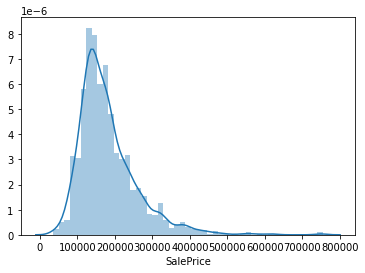

In [10]:
sns.distplot(df_train.SalePrice)
print('Skewness of SalePrice : ',df_train.SalePrice.skew())

With a skewness of 1.88 and the above graph, we can say that our target variable looks heavily skewed.

## <font size="5"><font color='RED'> Univariate Analysis

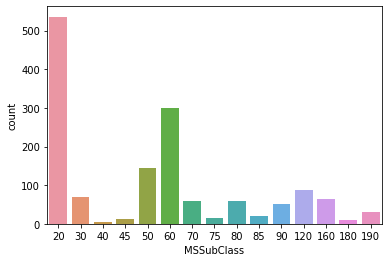

In [11]:
sns.countplot(df_train.MSSubClass)
plt.show()

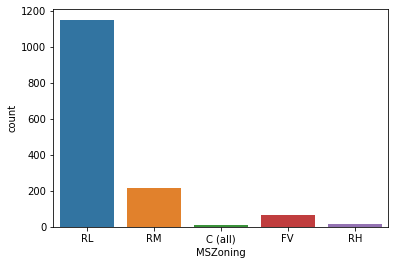

In [12]:
sns.countplot(df_train.MSZoning)
plt.show()

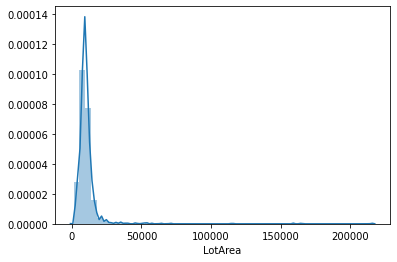

In [13]:
sns.distplot(df_train.LotArea)
plt.show()

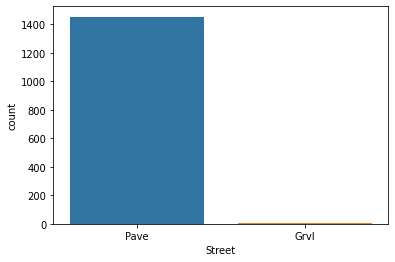

In [14]:
sns.countplot(df_train.Street)
plt.show()

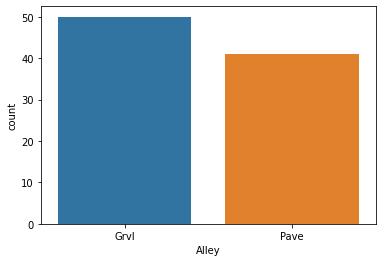

In [15]:
sns.countplot(df_train.Alley)
plt.show()

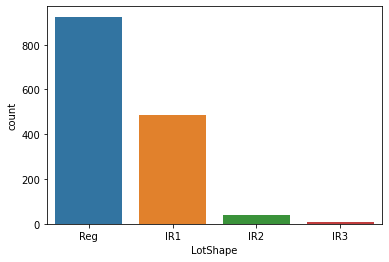

In [16]:
sns.countplot(df_train.LotShape)
plt.show()

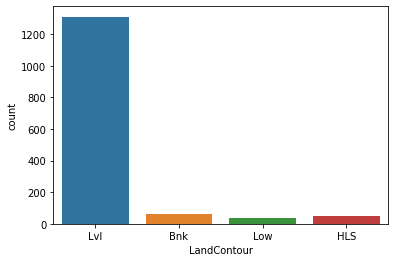

In [17]:
sns.countplot(df_train.LandContour)
plt.show()

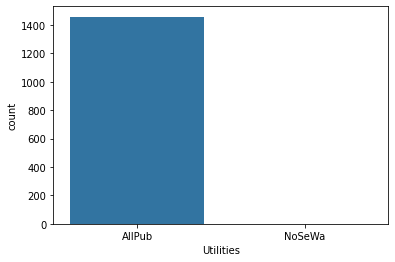

In [18]:
sns.countplot(df_train.Utilities)
plt.show()

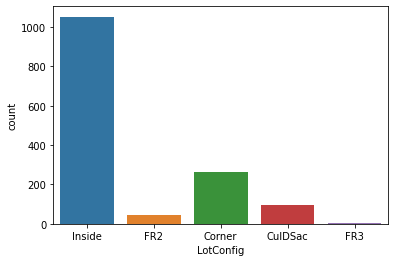

In [19]:
sns.countplot(df_train.LotConfig)
plt.show()

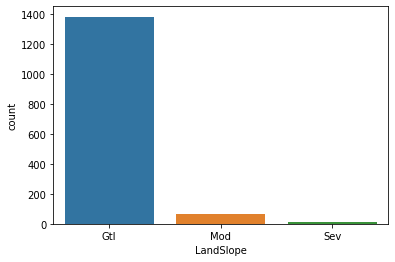

In [20]:
sns.countplot(df_train.LandSlope)
plt.show()

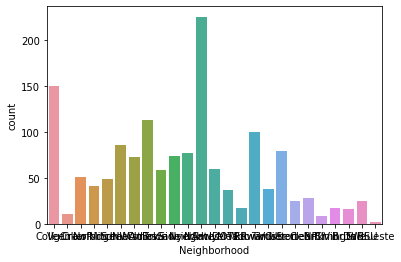

In [21]:
sns.countplot(df_train.Neighborhood)
plt.show()

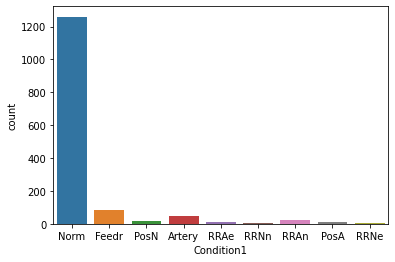

In [22]:
sns.countplot(df_train.Condition1)
plt.show()

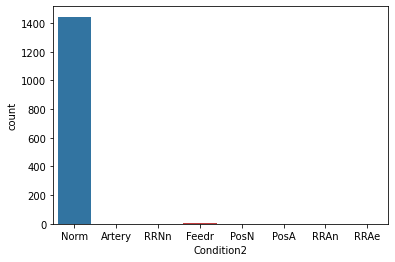

In [23]:
sns.countplot(df_train.Condition2)
plt.show()

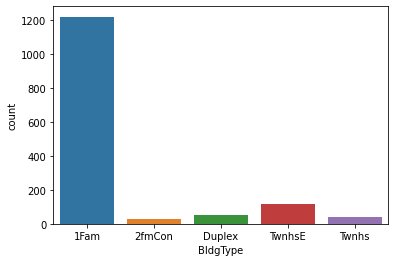

In [24]:
sns.countplot(df_train.BldgType)
plt.show()

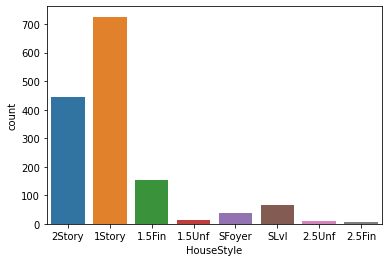

In [25]:
sns.countplot(df_train.HouseStyle)
plt.show()

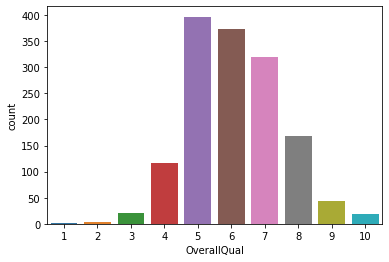

In [26]:
sns.countplot(df_train.OverallQual)
plt.show()

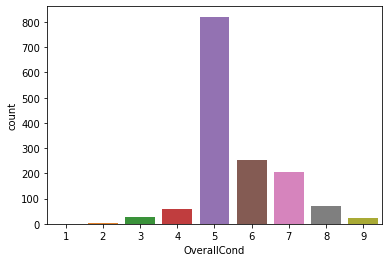

In [27]:
sns.countplot(df_train.OverallCond)
plt.show()

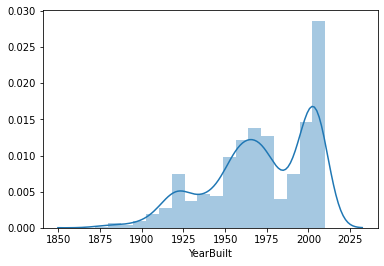

In [28]:
sns.distplot(df_train.YearBuilt)
plt.show()

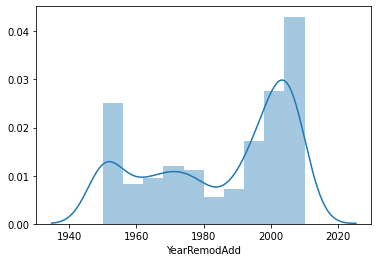

In [29]:
sns.distplot(df_train.YearRemodAdd)
plt.show()

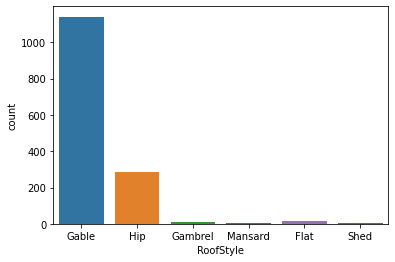

In [30]:
sns.countplot(df_train.RoofStyle)
plt.show()

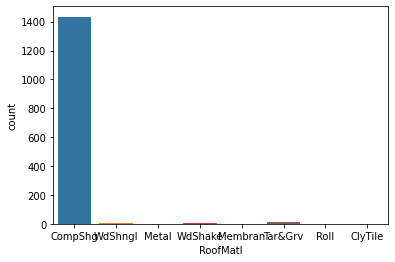

In [31]:
sns.countplot(df_train.RoofMatl)
plt.show()

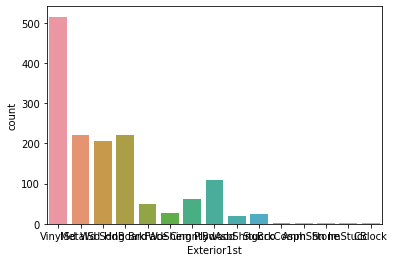

In [32]:
sns.countplot(df_train.Exterior1st)
plt.show()

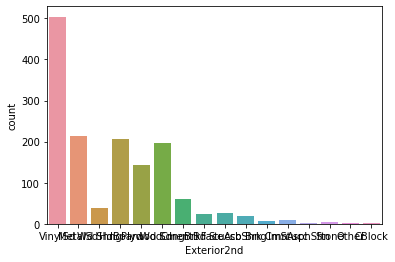

In [33]:
sns.countplot(df_train.Exterior2nd)
plt.show()

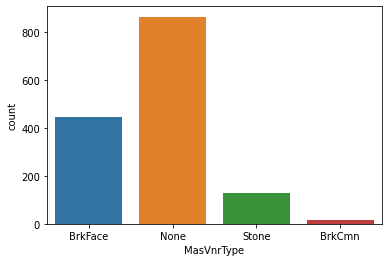

In [34]:
sns.countplot(df_train.MasVnrType)
plt.show()

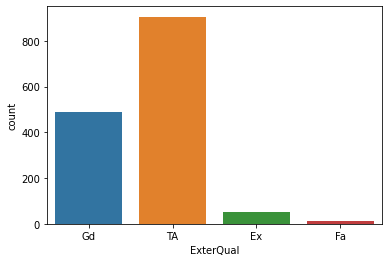

In [35]:
sns.countplot(df_train.ExterQual)
plt.show()

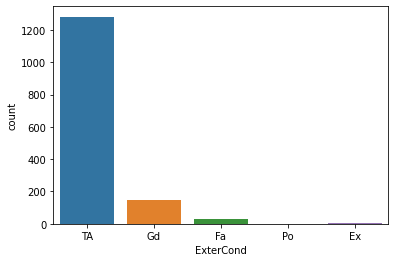

In [36]:
sns.countplot(df_train.ExterCond)
plt.show()

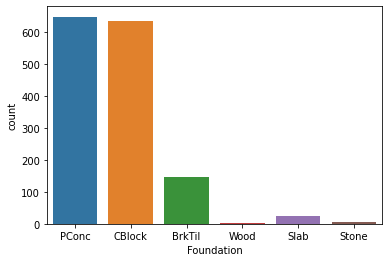

In [37]:
sns.countplot(df_train.Foundation)
plt.show()

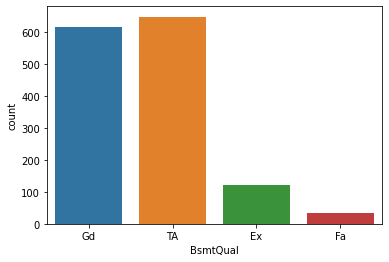

In [38]:
sns.countplot(df_train.BsmtQual)
plt.show()

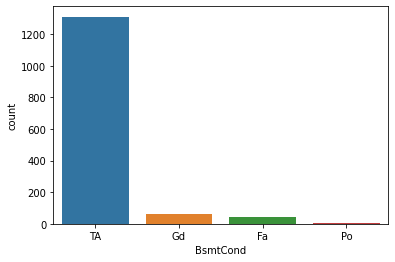

In [39]:
sns.countplot(df_train.BsmtCond)
plt.show()

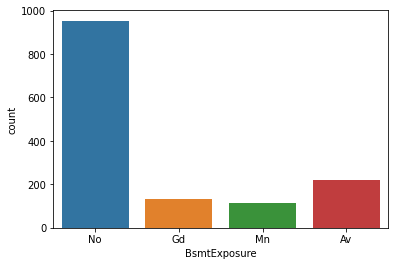

In [40]:
sns.countplot(df_train.BsmtExposure)
plt.show()

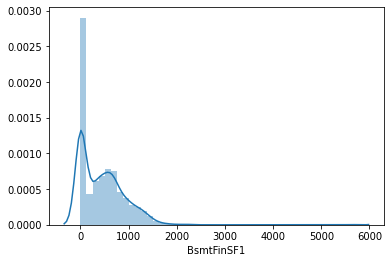

In [41]:
sns.distplot(df_train.BsmtFinSF1)
plt.show()

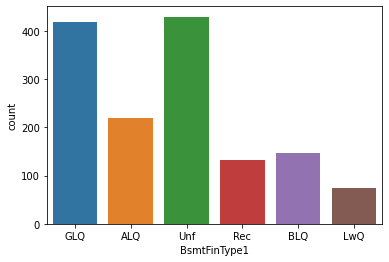

In [42]:
sns.countplot(df_train.BsmtFinType1)
plt.show()

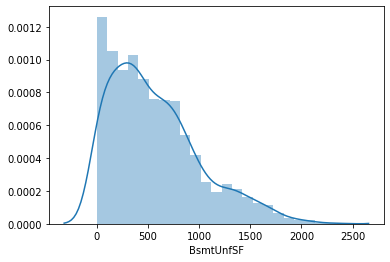

In [43]:
sns.distplot(df_train.BsmtUnfSF)
plt.show()

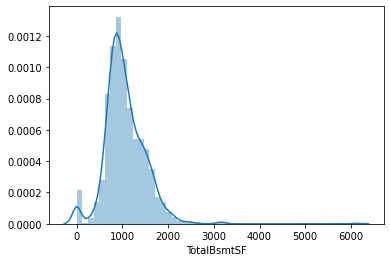

In [44]:
sns.distplot(df_train.TotalBsmtSF)
plt.show()

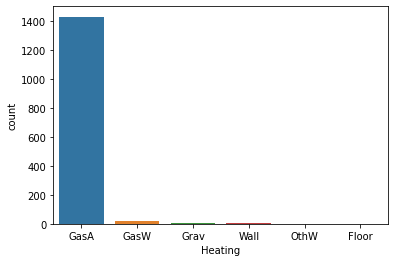

In [45]:
sns.countplot(df_train.Heating)
plt.show()

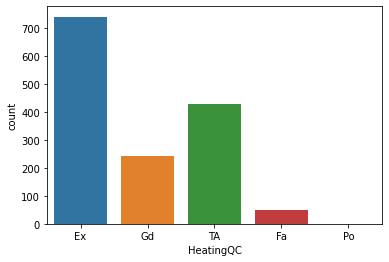

In [46]:
sns.countplot(df_train.HeatingQC)
plt.show()

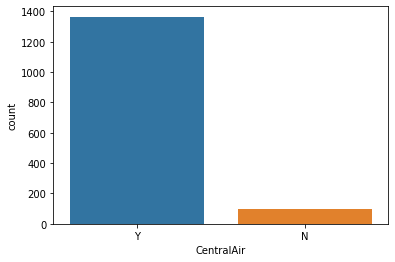

In [47]:
sns.countplot(df_train.CentralAir) #0 denotes no central air conditioning.
plt.show()

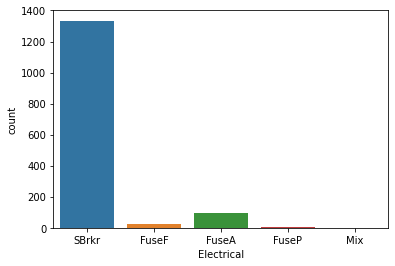

In [48]:
sns.countplot(df_train.Electrical)
plt.show()

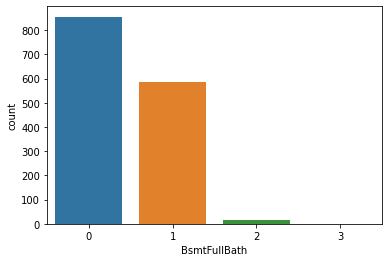

In [49]:
sns.countplot(df_train.BsmtFullBath)
plt.show()

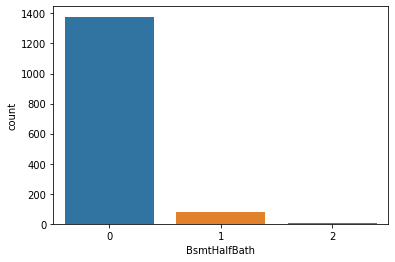

In [50]:
sns.countplot(df_train.BsmtHalfBath)
plt.show()

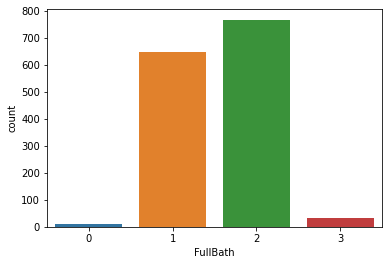

In [51]:
sns.countplot(df_train.FullBath)
plt.show()

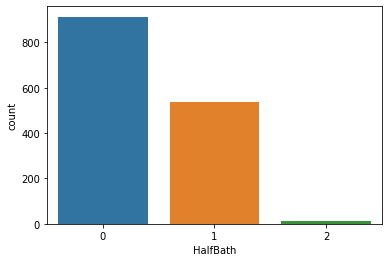

In [52]:
sns.countplot(df_train.HalfBath)
plt.show()

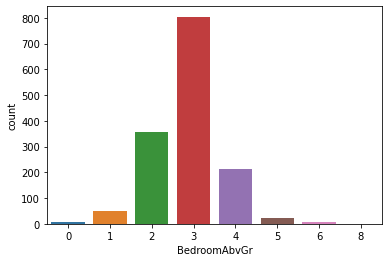

In [53]:
sns.countplot(df_train.BedroomAbvGr)
plt.show()

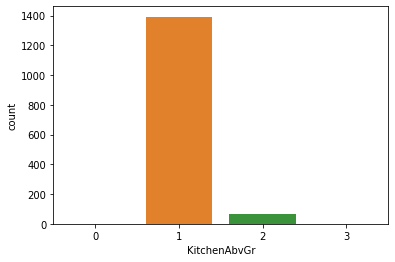

In [54]:
sns.countplot(df_train.KitchenAbvGr)
plt.show()

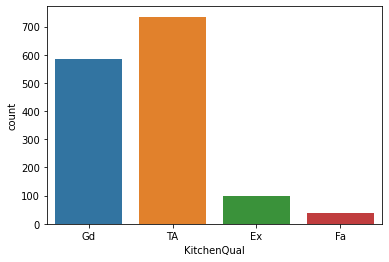

In [55]:
sns.countplot(df_train.KitchenQual)
plt.show()

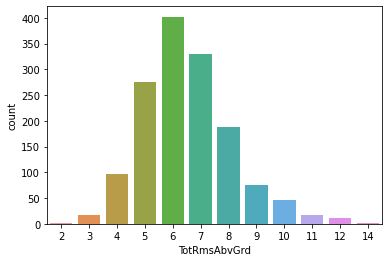

In [56]:
sns.countplot(df_train.TotRmsAbvGrd)
plt.show()

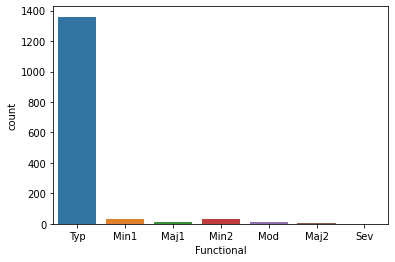

In [57]:
sns.countplot(df_train.Functional)
plt.show()

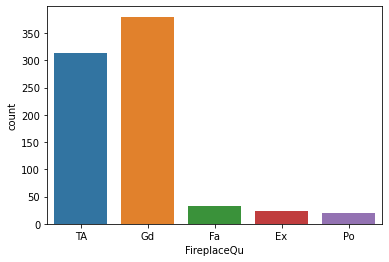

In [58]:
sns.countplot(df_train.FireplaceQu)
plt.show()

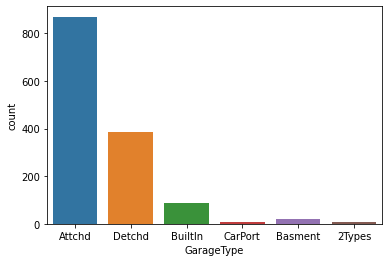

In [59]:
sns.countplot(df_train.GarageType)
plt.show()

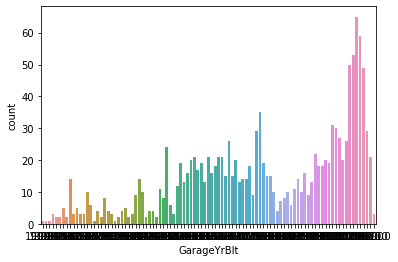

In [60]:
sns.countplot(df_train.GarageYrBlt)
plt.show()

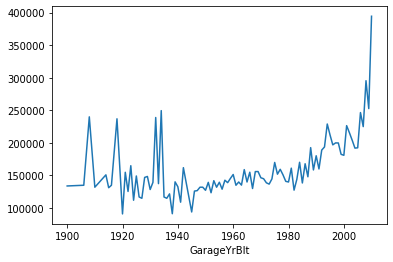

In [61]:
df_train.groupby('GarageYrBlt')['SalePrice'].median().plot();

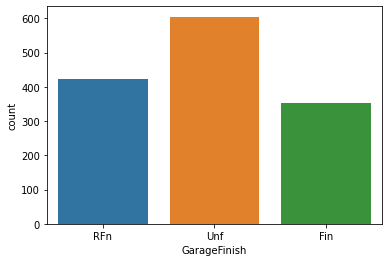

In [62]:
sns.countplot(df_train.GarageFinish)
plt.show()

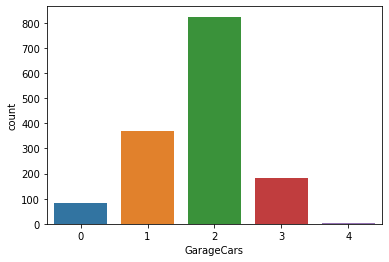

In [63]:
sns.countplot(df_train.GarageCars)
plt.show()

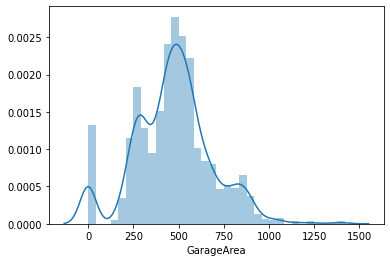

In [64]:
sns.distplot(df_train.GarageArea)
plt.show()

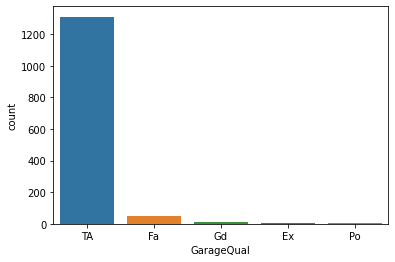

In [65]:
sns.countplot(df_train.GarageQual)
plt.show()

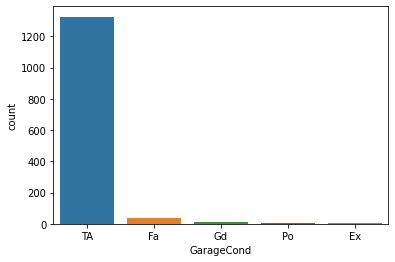

In [66]:
sns.countplot(df_train.GarageCond)
plt.show()

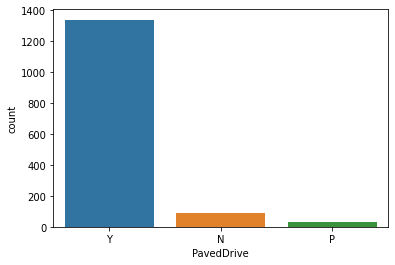

In [67]:
sns.countplot(df_train.PavedDrive)
plt.show()

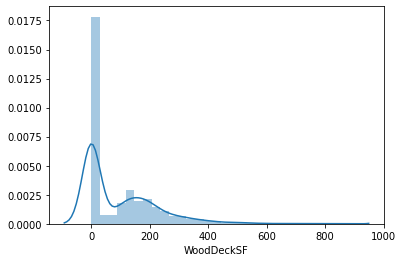

In [68]:
sns.distplot(df_train.WoodDeckSF)
plt.show()

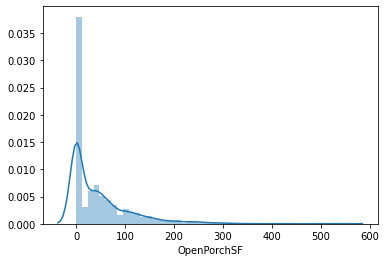

In [69]:
sns.distplot(df_train.OpenPorchSF)
plt.show()

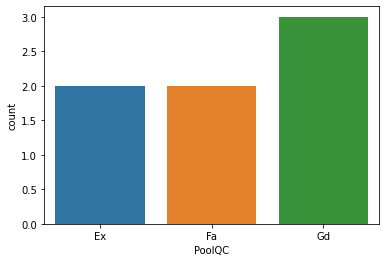

In [70]:
sns.countplot(df_train.PoolQC)
plt.show()

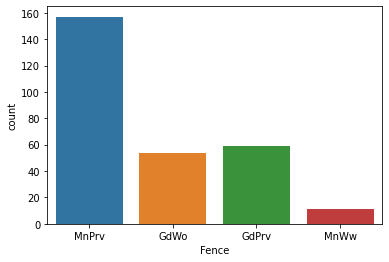

In [71]:
sns.countplot(df_train.Fence)
plt.show()

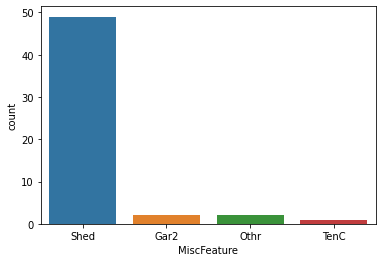

In [72]:
sns.countplot(df_train.MiscFeature)
plt.show()

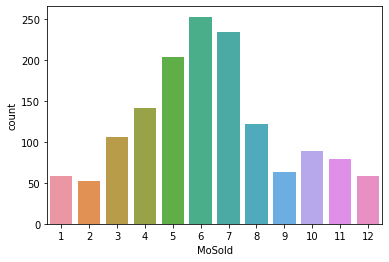

In [73]:
sns.countplot(df_train.MoSold)
plt.show()

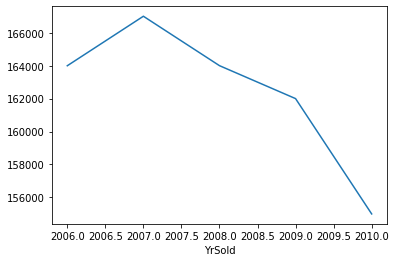

In [74]:
df_train.groupby('YrSold')['SalePrice'].median().plot();

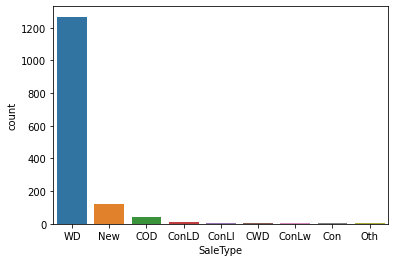

In [75]:
sns.countplot(df_train.SaleType)
plt.show()

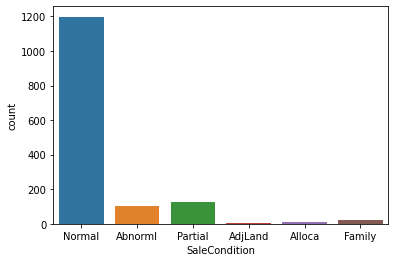

In [76]:
sns.countplot(df_train.SaleCondition)
plt.show()

In [77]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


**Computation of missing values in the data.**

In [78]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [79]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456.0,0.997260
MiscFeature,1408.0,0.964384
Alley,1352.0,0.926027
Fence,1169.0,0.800685
FireplaceQu,730.0,0.500000
LotFrontage,227.0,0.155479
GarageCond,78.0,0.053425
GarageQual,78.0,0.053425
GarageYrBlt,78.0,0.053425
GarageFinish,78.0,0.053425


**Imputation of Missing Values.**

In [80]:
# fill up missing values with the mode value
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])
df_train['Alley'] = df_train['Alley'].fillna(df_train['Alley'].mode()[0])
df_train['Utilities'] = df_train['Utilities'].fillna(df_train['Utilities'].mode()[0])
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])
df_train["MasVnrType"] = df_train["MasVnrType"].fillna(df_train['MasVnrType'].mode()[0])
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(df_train['MasVnrArea'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['PoolQC'] = df_train['PoolQC'].fillna(df_train['PoolQC'].mode()[0])
df_train['MiscFeature'] = df_train['MiscFeature'].fillna(df_train['MiscFeature'].mode()[0])
df_train['Fence'] = df_train['Fence'].fillna(df_train['Fence'].mode()[0])
df_train['Functional'] = df_train['Functional'].fillna(df_train['Functional'].mode()[0])
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mode()[0])
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['BsmtFinSF1'] = df_train['BsmtFinSF1'].fillna(df_train['BsmtFinSF1'].mode()[0])
df_train['BsmtFinSF2'] = df_train['BsmtFinSF2'].fillna(df_train['BsmtFinSF2'].mode()[0])

# fill up missing values with the mode value
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Alley'] = df_test['Alley'].fillna(df_test['Alley'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test["MasVnrType"] = df_test["MasVnrType"].fillna(df_test['MasVnrType'].mode()[0])
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(df_test['MasVnrArea'].mode()[0])
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['PoolQC'] = df_test['PoolQC'].fillna(df_test['PoolQC'].mode()[0])
df_test['MiscFeature'] = df_test['MiscFeature'].fillna(df_test['MiscFeature'].mode()[0])
df_test['Fence'] = df_test['Fence'].fillna(df_test['Fence'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mode()[0])
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode()[0])

   
# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

   # for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

# as there is no garage, NA value for this column is set to zero
for col in ('GarageArea', 'GarageCars', 'GarageYrBlt'):
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

**Label Encoding the data.**

In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_train.MSZoning = le.fit_transform(df_train.MSZoning)
df_train.Street = le.fit_transform(df_train.Street)
df_train.Alley = le.fit_transform(df_train.Alley)
df_train.LotShape = le.fit_transform(df_train.LotShape)
df_train.LandContour = le.fit_transform(df_train.LandContour)
df_train.Utilities = le.fit_transform(df_train.Utilities)
df_train.LotConfig = le.fit_transform(df_train.LotConfig)
df_train.LandSlope = le.fit_transform(df_train.LandSlope)
df_train.Neighborhood = le.fit_transform(df_train.Neighborhood)
df_train.Condition1 = le.fit_transform(df_train.Condition1)
df_train.Condition2 = le.fit_transform(df_train.Condition2)
df_train.BldgType = le.fit_transform(df_train.BldgType)
df_train.HouseStyle = le.fit_transform(df_train.HouseStyle)
df_train.RoofStyle = le.fit_transform(df_train.RoofStyle)
df_train.RoofMatl = le.fit_transform(df_train.RoofMatl)
df_train.Exterior1st = le.fit_transform(df_train.Exterior1st)
df_train.Exterior2nd = le.fit_transform(df_train.Exterior2nd)
df_train.MasVnrType = le.fit_transform(df_train.MasVnrType)
df_train.ExterQual = le.fit_transform(df_train.ExterQual)
df_train.ExterCond = le.fit_transform(df_train.ExterCond)
df_train.Foundation = le.fit_transform(df_train.Foundation)
df_train.BsmtQual = le.fit_transform(df_train.BsmtQual)
df_train.BsmtCond = le.fit_transform(df_train.BsmtCond)
df_train.BsmtExposure = le.fit_transform(df_train.BsmtExposure)
df_train.BsmtFinType1 = le.fit_transform(df_train.BsmtFinType1)
df_train.BsmtFinSF1 = le.fit_transform(df_train.BsmtFinSF1)
df_train.BsmtFinType2 = le.fit_transform(df_train.BsmtFinType2)
df_train.BsmtFinSF2 = le.fit_transform(df_train.BsmtFinSF2)
df_train.Heating = le.fit_transform(df_train.Heating)
df_train.HeatingQC = le.fit_transform(df_train.HeatingQC)
df_train.CentralAir = le.fit_transform(df_train.CentralAir)
df_train.Electrical = le.fit_transform(df_train.Electrical)
df_train.KitchenQual = le.fit_transform(df_train.KitchenQual)
df_train.Functional = le.fit_transform(df_train.Functional)
df_train.FireplaceQu = le.fit_transform(df_train.FireplaceQu)
df_train.GarageType = le.fit_transform(df_train.GarageType)
df_train.GarageFinish = le.fit_transform(df_train.GarageFinish)
df_train.GarageQual = le.fit_transform(df_train.GarageQual)
df_train.GarageCond = le.fit_transform(df_train.GarageCond)
df_train.PavedDrive = le.fit_transform(df_train.PavedDrive)
df_train.PoolQC = le.fit_transform(df_train.PoolQC)
df_train.Fence = le.fit_transform(df_train.Fence)
df_train.MiscFeature = le.fit_transform(df_train.MiscFeature)
df_train.SaleType = le.fit_transform(df_train.SaleType)
df_train.SaleCondition = le.fit_transform(df_train.SaleCondition)


df_test.MSZoning = le.fit_transform(df_test.MSZoning)
df_test.Street = le.fit_transform(df_test.Street)
df_test.Alley = le.fit_transform(df_test.Alley)
df_test.LotShape = le.fit_transform(df_test.LotShape)
df_test.LandContour = le.fit_transform(df_test.LandContour)
df_test.Utilities = le.fit_transform(df_test.Utilities)
df_test.LotConfig = le.fit_transform(df_test.LotConfig)
df_test.LandSlope = le.fit_transform(df_test.LandSlope)
df_test.Neighborhood = le.fit_transform(df_test.Neighborhood)
df_test.Condition1 = le.fit_transform(df_test.Condition1)
df_test.Condition2 = le.fit_transform(df_test.Condition2)
df_test.BldgType = le.fit_transform(df_test.BldgType)
df_test.HouseStyle = le.fit_transform(df_test.HouseStyle)
df_test.RoofStyle = le.fit_transform(df_test.RoofStyle)
df_test.RoofMatl = le.fit_transform(df_test.RoofMatl)
df_test.Exterior1st = le.fit_transform(df_test.Exterior1st)
df_test.Exterior2nd = le.fit_transform(df_test.Exterior2nd)
df_test.MasVnrType = le.fit_transform(df_test.MasVnrType)
df_test.ExterQual = le.fit_transform(df_test.ExterQual)
df_test.ExterCond = le.fit_transform(df_test.ExterCond)
df_test.Foundation = le.fit_transform(df_test.Foundation)
df_test.BsmtQual = le.fit_transform(df_test.BsmtQual)
df_test.BsmtCond = le.fit_transform(df_test.BsmtCond)
df_test.BsmtExposure = le.fit_transform(df_test.BsmtExposure)
df_test.BsmtFinType1 = le.fit_transform(df_test.BsmtFinType1)
df_test.BsmtFinSF1 = le.fit_transform(df_test.BsmtFinSF1)
df_test.BsmtFinType2 = le.fit_transform(df_test.BsmtFinType2)
df_test.BsmtFinSF2 = le.fit_transform(df_test.BsmtFinSF2)
df_test.Heating = le.fit_transform(df_test.Heating)
df_test.HeatingQC = le.fit_transform(df_test.HeatingQC)
df_test.CentralAir = le.fit_transform(df_test.CentralAir)
df_test.Electrical = le.fit_transform(df_test.Electrical)
df_test.KitchenQual = le.fit_transform(df_test.KitchenQual)
df_test.Functional = le.fit_transform(df_test.Functional)
df_test.FireplaceQu = le.fit_transform(df_test.FireplaceQu)
df_test.GarageType = le.fit_transform(df_test.GarageType)
df_test.GarageFinish = le.fit_transform(df_test.GarageFinish)
df_test.GarageQual = le.fit_transform(df_test.GarageQual)
df_test.GarageCond = le.fit_transform(df_test.GarageCond)
df_test.PavedDrive = le.fit_transform(df_test.PavedDrive)
df_test.PoolQC = le.fit_transform(df_test.PoolQC)
df_test.Fence = le.fit_transform(df_test.Fence)
df_test.MiscFeature = le.fit_transform(df_test.MiscFeature)
df_test.SaleType = le.fit_transform(df_test.SaleType)
df_test.SaleCondition = le.fit_transform(df_test.SaleCondition)

**Dropping features that will not be helpful for our prediction.**

In [82]:
y = df_train.SalePrice.values

X = df_train.drop(['SalePrice', 'Id', 'Alley', 'FireplaceQu', 'GarageType', 'PoolQC', 'MiscFeature', 
                   'MSSubClass', 'LotFrontage', 'LotArea', 'LandContour', 'Condition2', 'BldgType', 'BsmtFinType2',
                   'TotRmsAbvGrd', 'Functional', 'Fence'], axis = 1)
X_test = df_test.drop(['Id', 'Alley', 'FireplaceQu', 'GarageType', 'PoolQC', 'MiscFeature', 
                       'MSSubClass', 'LotFrontage', 'LotArea', 'LandContour', 'Condition2', 'BldgType', 'BsmtFinType2',
                       'TotRmsAbvGrd', 'Functional', 'Fence'], axis = 1)

**Splitting the data**

In [83]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)

**Algorithm Selection**

In [84]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=1000, max_depth=10, min_samples_split=2,
                                  learning_rate=.01, loss='lad', random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))

[21:30:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9997758764427713


**Predicting our model**

In [85]:
y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val))

0.9421054572164745


In [86]:
final_labels = model.predict(X_test)
final_labels = final_labels.astype(int)
final_labels

array([120963, 151786, 176627, ..., 140302, 111371, 217652])

In [87]:
final_result = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': final_labels})

In [88]:
final_result

,Id,SalePrice
0,1461,120963
1,1462,151786
2,1463,176627
3,1464,185709
4,1465,189711
...,...,...
1454,2915,84146
1455,2916,84631
1456,2917,140302
1457,2918,111371
